In [190]:
import os
import numpy as np
import dbpy
import sys
import matplotlib.pyplot as plt
from math import *
import stpy
import ippy

%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
from IPython.display import HTML
HTML("""
<script>
window.IPython = {
  notebook: {
    kernel: { execute: function(cmd) { console.log("kernel exec blocked:", cmd); } }
  }
};
</script>
""")

In [192]:
#output: -1: not yet exist, 0 = stopped (ready to read), 1: paused, 2: running)
run_newest = dbpy.read_runnumber_newest(3)
print(run_newest)

1616856


In [193]:
def read_det(bl, run, detID):
    taglist = dbpy.read_taglist_byrun(3, run)
    numIm = len(taglist)
    print('Run: {}\nNumber of images: {}\nDetector ID: {}'.format(run, numIm, detID))
    
    #stpy.StorageReader(detectorID, bl, run_numbers)
    #run_numbers: tuple of run list
    obj = stpy.StorageReader(detID, 3, (run,))
    buff = stpy.StorageBuffer(obj)
    obj.collect(buff, taglist[0])
    im2D = buff.read_det_data(0)

    im2Dall = np.zeros((numIm, len(im2D[:,0]), len(im2D[0,:])))
    im2Dall[0] = im2D.copy()

    i = 1
    for tag in taglist[1:]:
        if i % 100 == 0:
            sys.stdout.write('\r%d' % i)
            sys.stdout.flush()
        obj.collect(buff, tag)
        im2Dall[i] = buff.read_det_data(0).copy()
        i += 1
    
    return im2Dall

In [194]:
# detID = 'MPCCD-2N0-M02-001-1'
# run = 1360685

# im2Dall = read_det(3, run, detID)
# plt.imshow(im2Dall[0])
# plt.colorbar()

In [195]:
def read_det_sbt(bl, run, detID, imDark):
    taglist = dbpy.read_taglist_byrun(3, run)
    numIm = len(taglist)
    print('\nRun: {}\nNumber of images: {}\nDetector ID: {}'.format(run, numIm, detID))
    
    #stpy.StorageReader(detectorID, bl, run_numbers)
    #run_numbers: tuple of run list
    obj = stpy.StorageReader(detID, 3, (run,))
    buff = stpy.StorageBuffer(obj)
    obj.collect(buff, taglist[0])
    im2D = buff.read_det_data(0)

    im2Dall_sbt = np.zeros((numIm, len(im2D[:,0]), len(im2D[0,:])))
    im2Dall_sbt[0] = im2D - imDark

    i = 1
    for tag in taglist[1:]:
        if i % 100 == 0:
            sys.stdout.write('\r%d' % i)
            sys.stdout.flush()
        obj.collect(buff, tag)
        im2Dall_sbt[i] = buff.read_det_data(0) - imDark
        i += 1
    
    return im2Dall_sbt

Run: 1360685
Number of images: 100
Detector ID: MPCCD-2N0-M02-001-1

Run: 1360991
Number of images: 552
Detector ID: MPCCD-2N0-M02-001-1
500

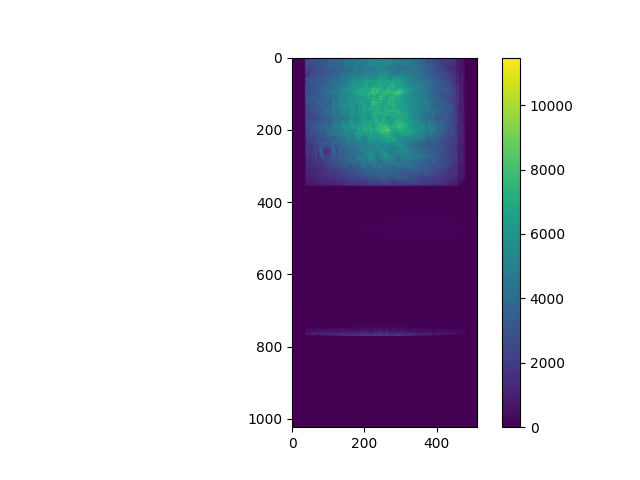

In [196]:
detID = 'MPCCD-2N0-M02-001-1'
run = 1360991
runDark = 1360685

imDark = np.mean(read_det(3, runDark, detID),0)
im2Dall = read_det_sbt(3, run, detID, imDark)
im2Dave = np.mean(im2Dall, 0)

plt.imshow(im2Dave)
plt.colorbar()

In [197]:
# Run # description
# 1616808 darks (1000 shots)
# 1616809 direct reference at 3rd MPCCD (300 shots)
darkRun_list = [1616808]

In [198]:
#output: dictionary of run information
run = 1616808
run_info = dbpy.read_runinfo(3, run)
print(run_info)

{'starttime': 1762404940.702467, 'stoptime': 1762404975.050937, 'total_tagnumber': 2000, 'start_tagnumber': 440286352, 'end_tagnumber': 440288352, 'hightagnumber': 202502, 'comment': 'darks', 'fy_id': 'exp2025-2', 'detectors': 'CITIUS1,MPCCD-1B1-M03-006,MPCCD-1N0-M06-004,MPCCD-1N0-M07-005,stor1_09,stor1_12,stor1_11', 'runtype': '', 'stationnumber': 4, 'runstatus': 0}


Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900

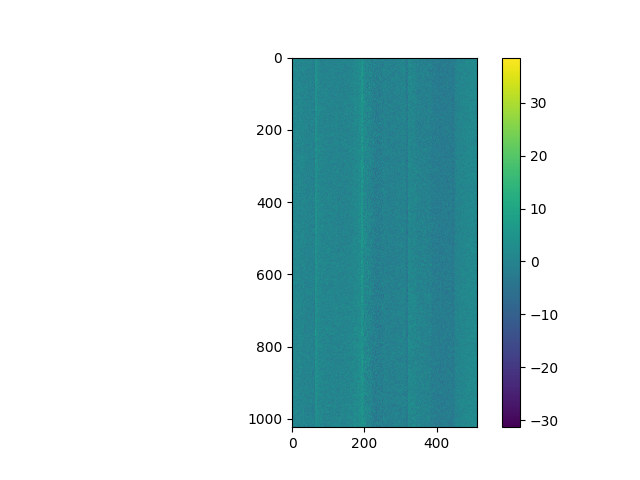

In [199]:
# Detector names: MPCCD-1B1-M03-006, MPCCD-1N0-M07-005, MPCCD-1N0-M06-004 
# Jack has image showing which is detector is which in set-up
detID = 'MPCCD-1N0-M07-005'
run = 1616808

im2Dall = read_det(3, run, detID)
plt.figure()
plt.imshow(im2Dall[0])
plt.colorbar()

In [200]:
from mpccd import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
detectorID_MPCCD3 = 'MPCCD-1B1-M03-006'
detectorID_MPCCD2 = 'MPCCD-1N0-M06-004'
detectorID_MPCCD1 = 'MPCCD-1N0-M07-005'


base_path = "."

MPCCD_3 = MPCCDProcessing(base_path, detectorID_MPCCD3)
MPCCD_2 = MPCCDProcessing(base_path, detectorID_MPCCD2)
MPCCD_1 = MPCCDProcessing(base_path, detectorID_MPCCD1)

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1B1-M03-006
900
Run: 1616809
Number of images: 300
Detector ID: MPCCD-1B1-M03-006
Dark runs subtracted
200

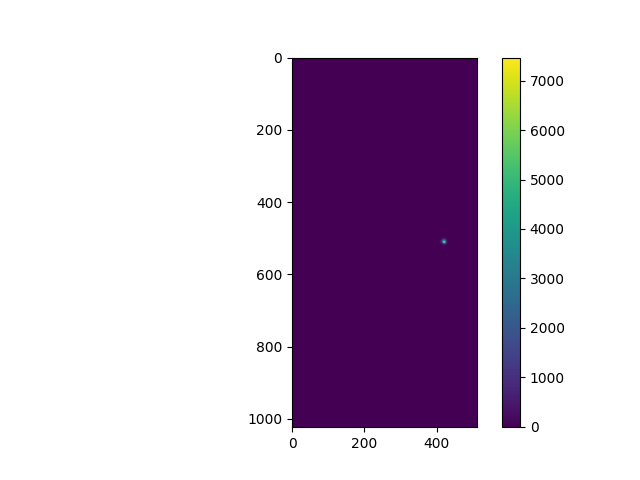

In [205]:
# read in a run and minus the dark #1616809 Direct reference at 3rd MPCCD
runNo = 1616809
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_004.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

plt.figure()
plt.imshow(im2Dave)
plt.colorbar()
plt.show()

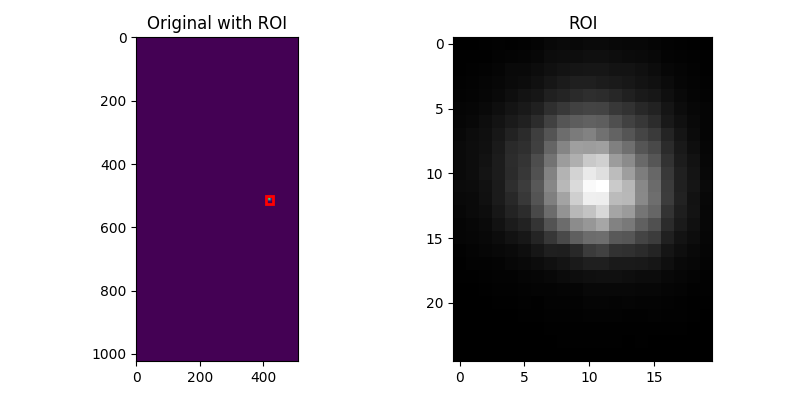

In [206]:
# Select ROI detector
x1, y1, x2, y2 = 410, 500, 430, 525  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title("ROI")

plt.tight_layout()
plt.show()

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616851
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
Dark runs subtracted
200

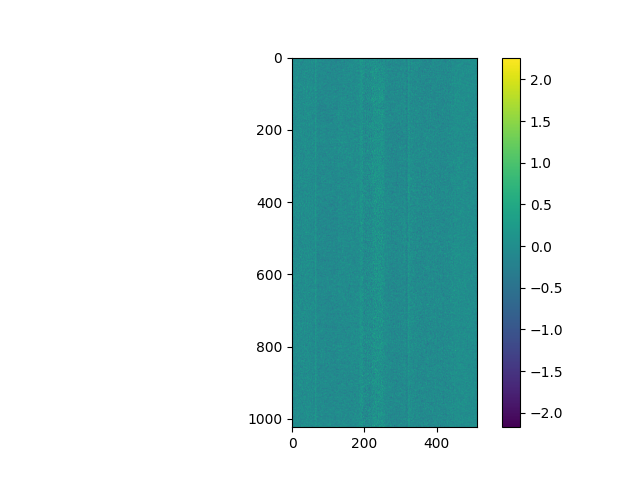

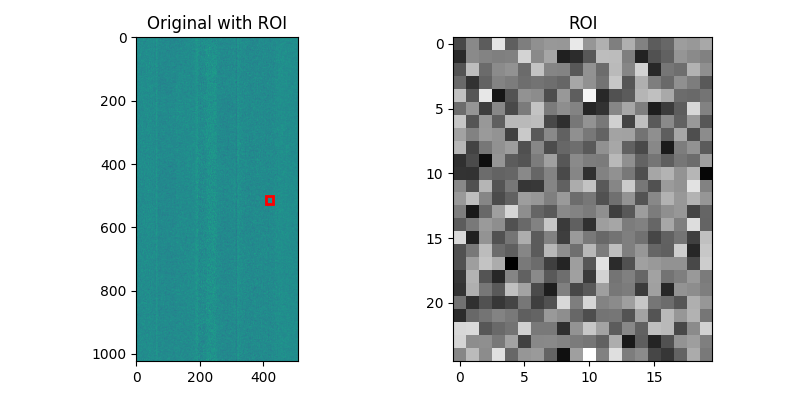

In [209]:
# read in a run and minus the dark #1616809 Direct reference at 3rd MPCCD
runNo = 1616851
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_1.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

plt.figure()
plt.imshow(im2Dave)
plt.colorbar()
plt.show()

# Select ROI detector
x1, y1, x2, y2 = 410, 500, 430, 525  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title("ROI")

plt.tight_layout()
plt.show()

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M06-004
900
Run: 1616851
Number of images: 300
Detector ID: MPCCD-1N0-M06-004
Dark runs subtracted
200

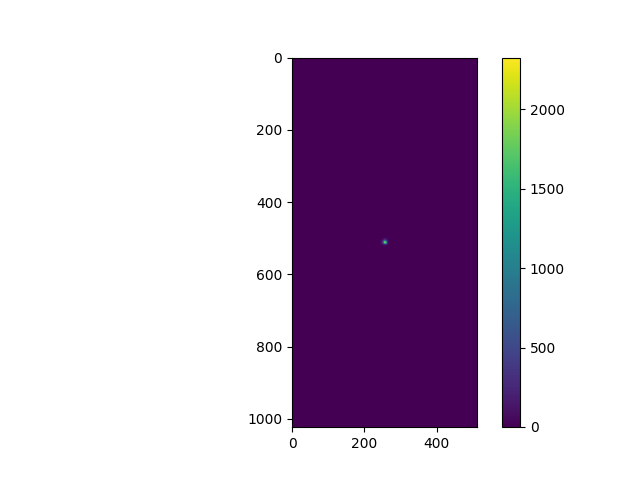

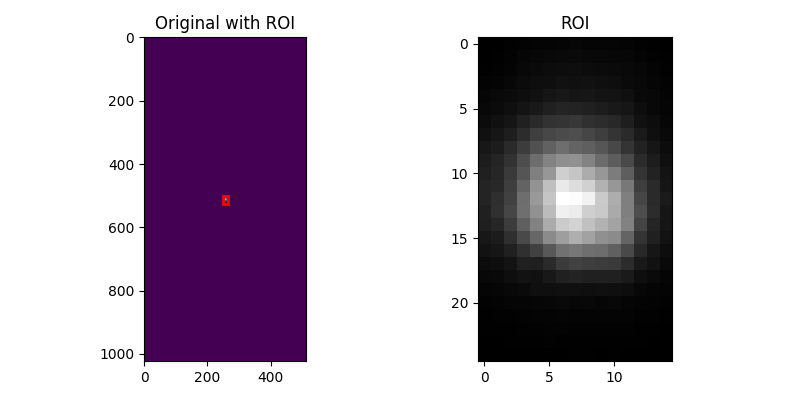

In [210]:
# read in a run and minus the dark #1616809 Direct reference at 2nd MPCCD
runNo = 1616851
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_2.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

plt.figure()
plt.imshow(im2Dave)
plt.colorbar()
plt.show()

# Select ROI detector
x1, y1, x2, y2 = 250, 500, 265, 525  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title("ROI")

plt.tight_layout()
plt.show()

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616852
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
Dark runs subtracted
200

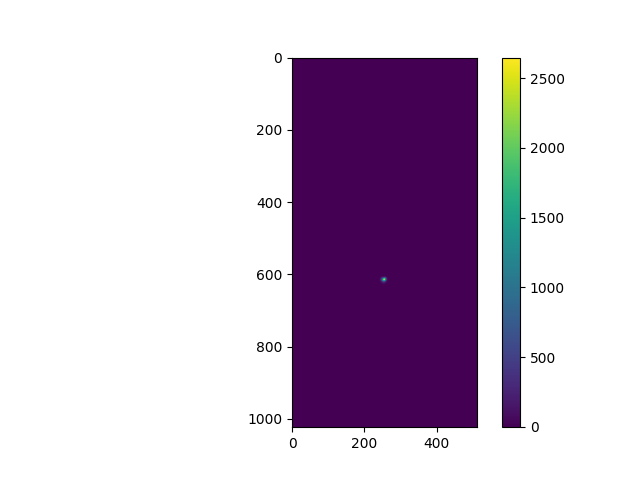

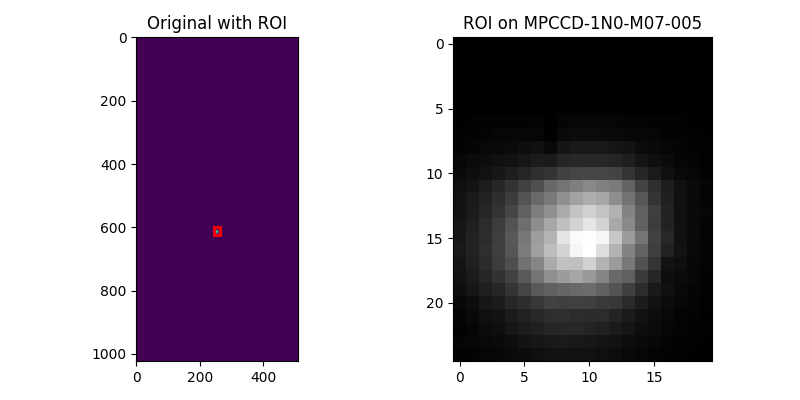

In [211]:
# read in a run and minus the dark #1616809 Direct reference at 3rd MPCCD
runNo = 1616852
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_1.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

plt.figure()
plt.imshow(im2Dave)
plt.colorbar()
plt.show()

# Select ROI detector
x1, y1, x2, y2 = 245, 600, 265, 625  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title(f"ROI on {detectorID_MPCCD1}")

plt.tight_layout()
plt.show()

In [215]:
all_values = MPCCD_1.create_run_histograms(x1, y1, x2, y2, run = runNo, runDark = runDarkNo)

Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616852
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
(300, 1024, 512)
Dark runs subtracted
200

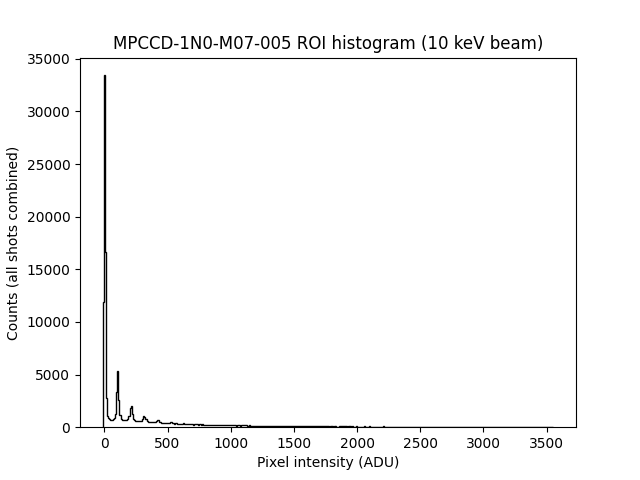

In [216]:
all_values = all_values[(all_values > np.percentile(all_values, 1)) &
                        (all_values < np.percentile(all_values, 99))]

plt.figure()
plt.hist(all_values, bins=400, histtype='step', color='black')
plt.xlabel("Pixel intensity (ADU)")
plt.ylabel("Counts (all shots combined)")
plt.title(f"{detectorID_MPCCD1} ROI histogram (10 keV beam)")
plt.show()

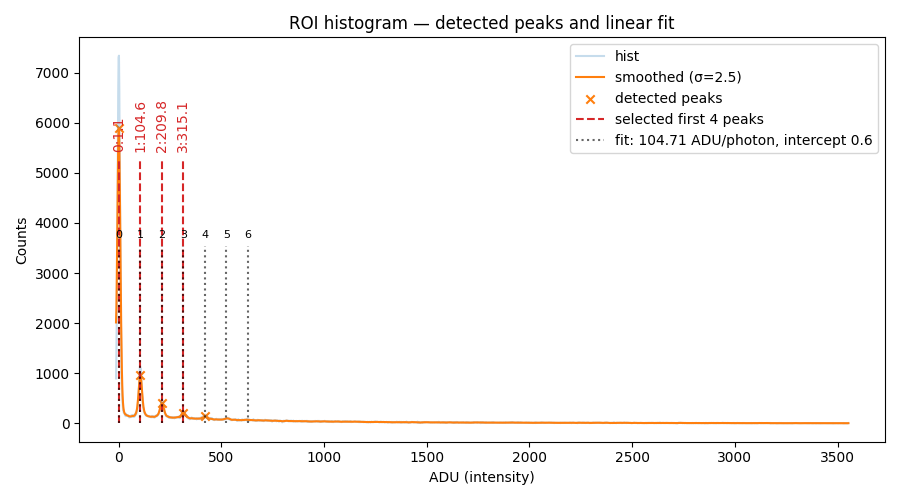

Selected peak ADU positions (first peaks): [  1.14 104.6  209.85 315.09]
Slope (ADU / photon): 104.7097
Intercept (ADU): 0.61
R^2 of linear fit (selected peaks): 1.0000
slope: 104.70965583785608, intercept: 0.6081802735898018


In [217]:
results = MPCCD_1.find_and_fit_peaks(all_values, nbins=2000, smooth_sigma=2.5, peak_prominence_frac=0.005)

print(f'slope: {MPCCD_1.slope}, intercept: {MPCCD_1.intercept}')

In [219]:
im2Dall, im2Dave = MPCCD_1.load_images(run = runNo, runDark = runDarkNo, calibrate=True)

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616852
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
Dark runs subtracted
200

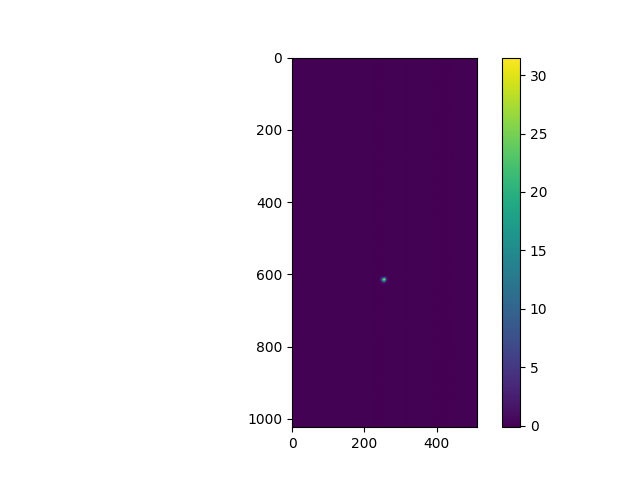

In [220]:
plt.figure()
plt.imshow(im2Dave)
plt.colorbar()
plt.show()